# Forecast Apple stock using ARIMA

### IMPORT LIBRARY

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

warnings.filterwarnings('ignore')

<ipython-input-1-3f2f28cb377e>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


### DATA LOADING

In [2]:
df = pd.read_csv('Final_apple_stock_twit.csv')

In [3]:
df.shape

(1250, 13)

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count,pos,neg,neutral
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950489,102223600,-0.093750,-3,32,1,4,27
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943359,118071600,-0.060000,-3,50,3,6,41
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133537,89738400,-0.176471,-6,34,1,7,26
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601860,94640000,-0.068966,-2,29,4,6,19
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200,-0.086957,-4,46,2,6,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700,-0.066667,-4,60,0,4,56
1246,2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200,-0.039474,-3,76,3,6,67
1247,2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200,-0.046875,-3,64,2,5,57
1248,2022-12-15,141.110001,141.800003,136.029999,136.500000,136.500000,98931900,0.024390,2,82,9,7,66


### PREPROCESS

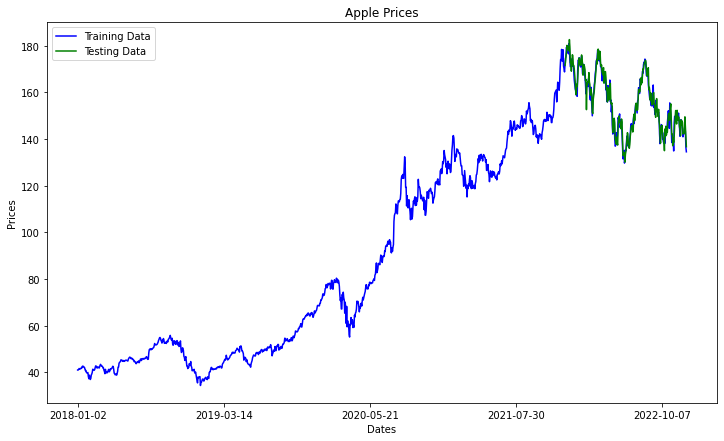

In [5]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1250, 300), df['Date'][0:1250:300])
plt.legend()

### MODELING

In [6]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [7]:
train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_absolute_error(test_ar, predictions)
print('Testing Mean Absolute Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Absolute Error: 2.676
Symmetric mean absolute percentage error: 9.283


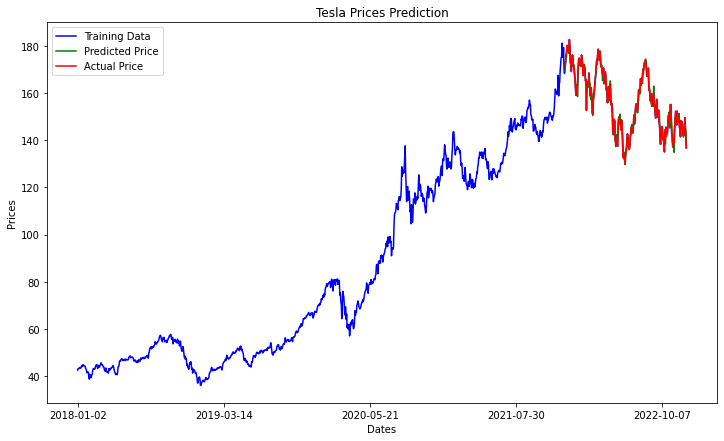

In [8]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
#plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         #label='Predicted Price')
plt.plot(test_data.index, predictions, color='green',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1250, 300), df['Date'][0:1250:300])
plt.legend()

### FORECAST 5 Day

([<matplotlib.axis.XTick at 0x7fa2e29839a0>], [Text(0, 0, '2022-11-18')])

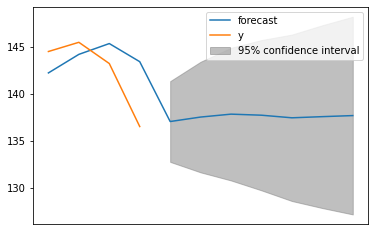

In [9]:
model_fit.plot_predict(1245,1255)
plt.xticks(np.arange(1230,1280,300), df['Date'][1230:1280:300])

### FORECAST 2 WEEK

([<matplotlib.axis.XTick at 0x7fa2e28c95e0>], [Text(0, 0, '2022-11-18')])

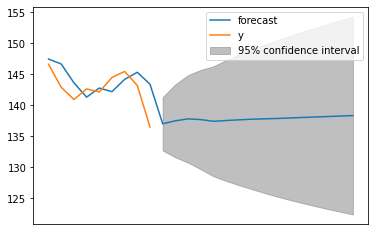

In [10]:
model_fit.plot_predict(1240,1264)
plt.xticks(np.arange(1230,1280,300), df['Date'][1230:1280:300])

### FORECAST 1 MONTH

([<matplotlib.axis.XTick at 0x7fa2e282ee20>], [Text(0, 0, '2022-11-18')])

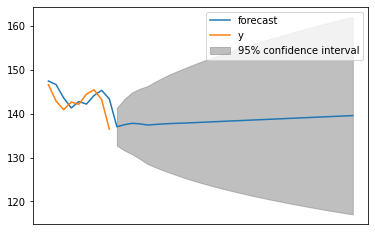

In [11]:
model_fit.plot_predict(1240,1280)
plt.xticks(np.arange(1230,1280,300), df['Date'][1230:1280:300])

### FORECAST 2 MONTH

([<matplotlib.axis.XTick at 0x7fa2e28135b0>,
 [Text(0, 0, '2018-01-02'),
  Text(0, 0, '2019-03-14'),
  Text(0, 0, '2020-05-21'),
  Text(0, 0, '2021-07-30'),
  Text(0, 0, '2022-10-07')])

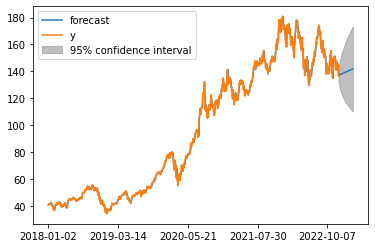

In [12]:
model_fit.plot_predict(1,1310)
plt.xticks(np.arange(0,1250, 300), df['Date'][0:1250:300])

([<matplotlib.axis.XTick at 0x7fa2e2783730>], [Text(0, 0, '2022-11-18')])

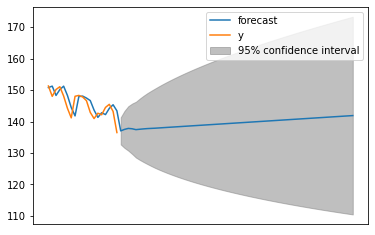

In [13]:
model_fit.plot_predict(1230,1310)
plt.xticks(np.arange(1230,1280,300), df['Date'][1230:1280:300])

### Forecast result to dataframe

In [14]:
result_Low =  model.fit()

# Forecast for the next 8 week
forecast_Low = result_Low.predict(start = len(df), 
                          end = (len(df)-1) + 60, 
                          typ = 'levels')

forecast_Low = pd.DataFrame(forecast_Low,columns=["forecast"])
forecast_Low

,forecast
0,137.034273
1,137.509888
2,137.820070
3,137.707264
4,137.430824
...,...
56,141.511609
57,141.588664
58,141.665720
59,141.742775


In [15]:
forecast_Low.to_csv('data_forecast.csv')